In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("imdb_top_250.csv")
df.head()

,id,title,year,rating,votes
0,#1,The Shawshank Redemption,1994,9.3,3100000
1,#2,The Godfather,1972,9.2,2200000
2,#3,The Dark Knight,2008,9.1,3100000
3,#4,The Godfather Part II,1974,9.0,1500000
4,#5,12 Angry Men,1957,9.0,960000


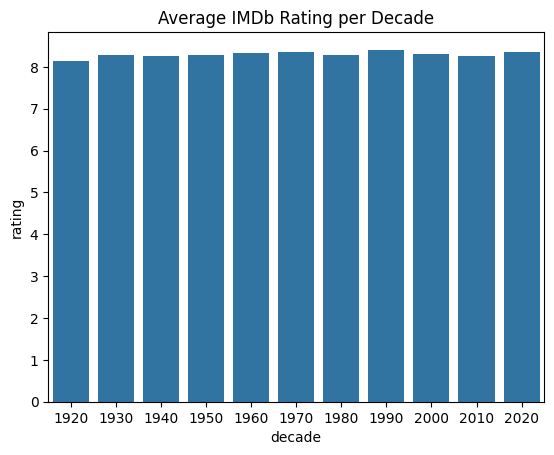

In [ ]:
# convert year to decade
df["decade"] = (df["year"] // 10) * 10

# 1. Average rating per decade
avg_rating = df.groupby("decade")["rating"].mean().reset_index()

# Plot average rating by decade
sns.barplot(data=avg_rating, x="decade", y="rating")
plt.title("Average IMDb Rating per Decade")
plt.show()

In [ ]:
# 1. Summary stats:
# Average rating, median votes
# Count of movies per decade
# 2. Distribution plots:
# Histogram of ratings
# Votes distribution (log scale)
# 3.Trend over time:
# Average rating per decade
# Number of movies per decade
# 4.Top movies by votes and rating:
# Scatter plot votes vs rating (with hover if Plotly)
# Highlight top 10 by rating and votes

In [ ]:
round(df["rating"].mean(), 2)
round(df["votes"].median())

decade_counts = (
    df.groupby("decade")["votes"].agg(["count", "mean", "median"]).reset_index()
)
decade_counts

,decade,count,mean,median
0,1920,6,1.175000e+05,116000.0
1,1930,6,2.695000e+05,248000.0
2,1940,11,2.605455e+05,190000.0
3,1950,21,2.753810e+05,235000.0
4,1960,16,3.478125e+05,290000.0
5,1970,19,7.355263e+05,676000.0
6,1980,26,6.941923e+05,569000.0
7,1990,39,1.184231e+06,1200000.0
8,2000,47,1.003574e+06,958000.0
9,2010,46,8.470217e+05,757000.0


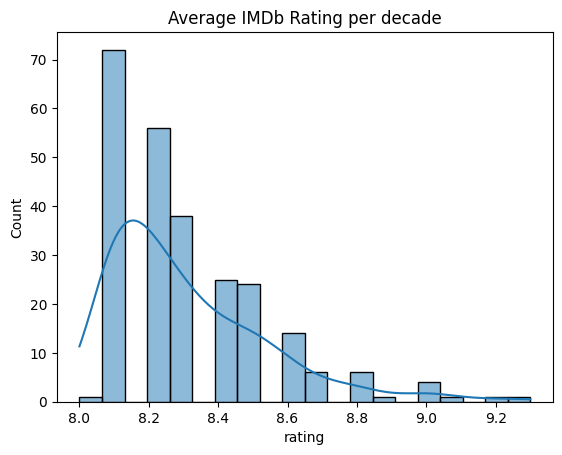

In [ ]:
# distribution by ratings
sns.histplot(df["rating"], bins=20, kde=True)
plt.title("Average IMDb Rating per decade")
plt.show()

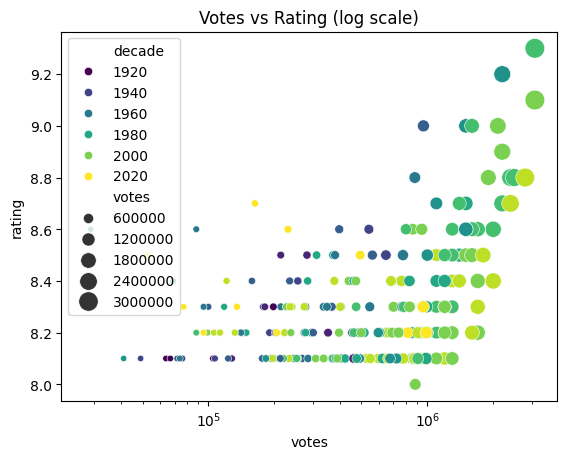

In [12]:
# 3. Votes vs Rating scatter
sns.scatterplot(
    data=df,
    x="votes",
    y="rating",
    hue="decade",
    palette="viridis",
    size="votes",
    sizes=(20, 200),
)
plt.xscale("log")
plt.title("Votes vs Rating (log scale)")
plt.show()

In [18]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "browser"

fig = px.scatter(
    df,
    x="votes",
    y="rating",
    color="decade",
    size="votes",
    hover_data=["title", "year"],
)
fig.update_xaxes(type="log", title="Votes (log scale)")
fig.update_yaxes(title="IMDb Rating")
fig.update_layout(title="Votes vs Rating with Decade Coloring")
fig.show()

In [ ]:
# movies with highest votes and ratings
top_movies = df.nlargest(10, "votes")[["title", "votes", "rating", "year"]]
top_movies

,title,votes,rating,year
0,The Shawshank Redemption,3100000,9.3,1994
2,The Dark Knight,3100000,9.1,2008
13,Inception,2800000,8.8,2010
12,Fight Club,2500000,8.8,1999
8,Pulp Fiction,2400000,8.8,1994
11,Forrest Gump,2400000,8.8,1994
17,Interstellar,2400000,8.7,2014
1,The Godfather,2200000,9.2,1972
7,The Lord of the Rings: The Fellowship of the Ring,2200000,8.9,2001
15,The Matrix,2200000,8.7,1999
